# Emotions Classifier CNN Model (30 Epochs)

In [1]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten

In [2]:
train_dir = '../input/fer2013/train/'
test_dir = '../input/fer2013/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')

print(train_count)
print(test_count)

       surprise  fear  angry  neutral   sad  disgust  happy
train      3171  4097   3995     4965  4830      436   7215
      surprise  fear  angry  neutral   sad  disgust  happy
test       831  1024    958     1233  1247      111   1774


<AxesSubplot:>

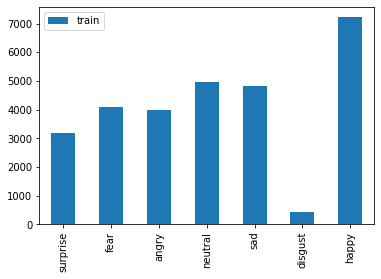

In [3]:
train_count.transpose().plot(kind='bar')

<AxesSubplot:>

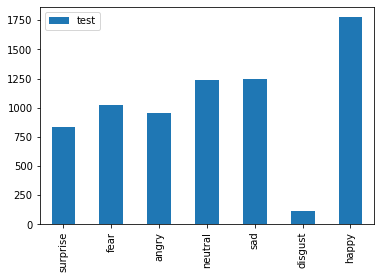

In [4]:
test_count.transpose().plot(kind='bar')

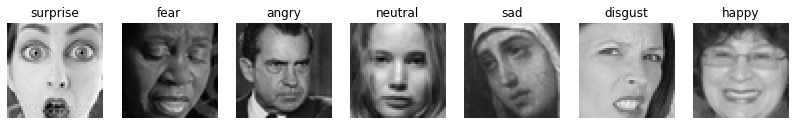

In [5]:
plt.figure(figsize=(14,22))
i = 1

for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
    
plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
test_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [9]:
model = tf.keras.models.Sequential()   

#Input layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = (48, 48, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(7, activation='softmax'))

#Compliling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

2022-12-08 13:19:06.177812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:19:06.278813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:19:06.279598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:19:06.281224: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

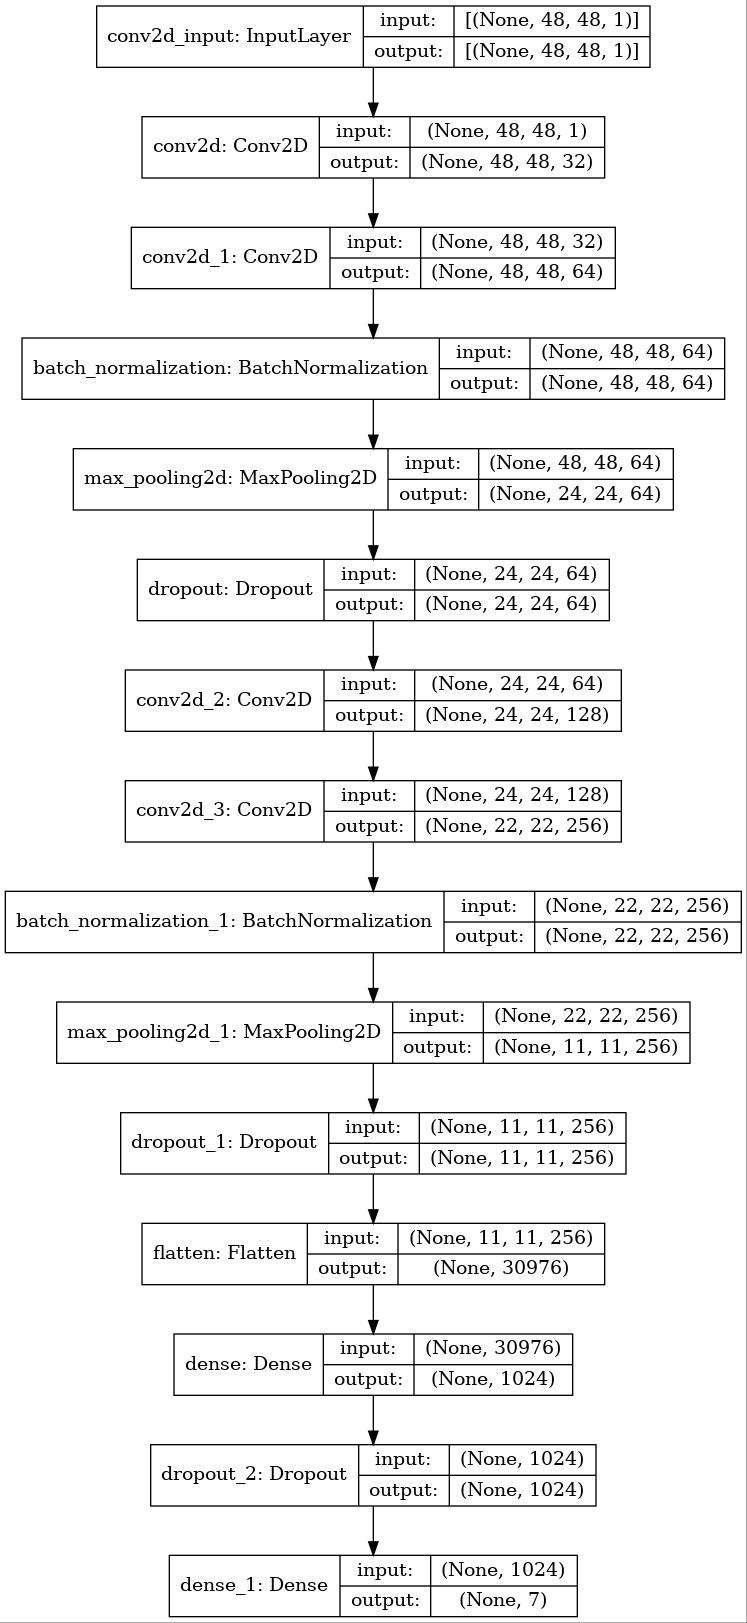

In [11]:
plot_model(model, to_file='model.jpg', show_shapes=True, show_layer_names=True)

In [12]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=30,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

2022-12-08 13:20:38.834215: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-08 13:20:40.886202: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


448/448 [==============================] - 125s 261ms/step - loss: 4.2924 - accuracy: 0.2762 - val_loss: 6.7077 - val_accuracy: 0.2208
Epoch 2/30
448/448 [==============================] - 40s 88ms/step - loss: 3.4915 - accuracy: 0.3375 - val_loss: 3.1144 - val_accuracy: 0.4047
Epoch 3/30
448/448 [==============================] - 40s 90ms/step - loss: 2.9590 - accuracy: 0.3747 - val_loss: 2.6204 - val_accuracy: 0.4396
Epoch 4/30
448/448 [==============================] - 40s 89ms/step - loss: 2.5340 - accuracy: 0.4072 - val_loss: 2.2656 - val_accuracy: 0.4537
Epoch 5/30
448/448 [==============================] - 39s 87ms/step - loss: 2.2205 - accuracy: 0.4302 - val_loss: 2.0320 - val_accuracy: 0.4457
Epoch 6/30
448/448 [==============================] - 40s 89ms/step - loss: 1.9744 - accuracy: 0.4519 - val_loss: 1.7424 - val_accuracy: 0.5144
Epoch 7/30
448/448 [==============================] - 40s 89ms/step - loss: 1.7862 - accuracy: 0.4775 - val_loss: 1.6267 - val_accuracy: 0.5114
E

In [13]:
train_loss, train_accu = model.evaluate(training_set)
test_loss, test_accu = model.evaluate(test_set)

print("final train accuracy = {:.2f}% , validation accuracy = {:.2f}%".format(train_accu*100, test_accu*100))

113/113 [==============================] - 6s 56ms/step - loss: 1.0974 - accuracy: 0.6510
final train accuracy = 80.75% , validation accuracy = 65.10%


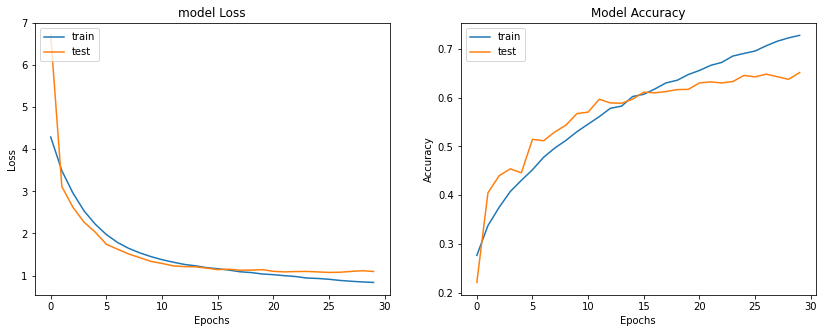

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [15]:
model.save('emotions_classifier.h5')
model.save_weights('emotions_classifier_weights.h5')

In [16]:
model.save('emotions_classifier.json')

2022-12-08 13:48:59.830459: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


**Confusion Matrix and Classification on training set**

Confusion Matrix
[[ 462   30  513 1077  715  763  435]
 [  49    5   53  117   83   77   52]
 [ 488   51  531 1105  694  750  478]
 [ 868   82  873 1932 1287 1369  804]
 [ 577   54  605 1324  911  895  599]
 [ 536   63  587 1276  853  961  554]
 [ 348   38  425  835  568  610  347]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.12      0.13      3995
     disgust       0.02      0.01      0.01       436
        fear       0.15      0.13      0.14      4097
       happy       0.25      0.27      0.26      7215
     neutral       0.18      0.18      0.18      4965
         sad       0.18      0.20      0.19      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.18     28709
   macro avg       0.15      0.15      0.14     28709
weighted avg       0.18      0.18      0.18     28709



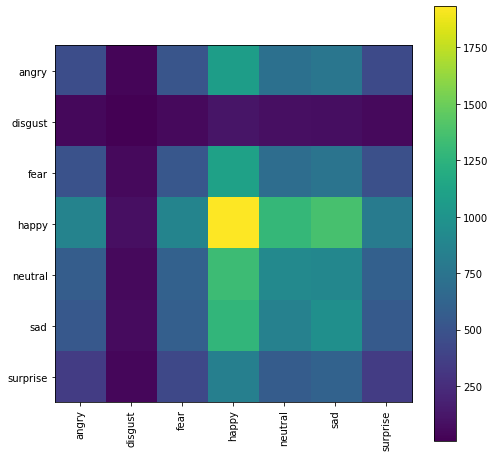

In [17]:
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix

cm_train = confusion_matrix(training_set.classes, y_pred)

print('Confusion Matrix')
print(cm_train)
print('Classification Report')

target_names = list(class_labels.values())

print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

**Confusion Matrix and Classification on test set**

Confusion Matrix
[[121   8 107 254 177 177 114]
 [ 10   0  11  35  25  18  12]
 [120  13 115 282 186 203 105]
 [194   9 185 461 348 340 237]
 [138  14 147 315 234 235 150]
 [160  13 161 305 242 224 142]
 [ 99   3  92 206 167 152 112]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.13      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.11      0.12      1024
       happy       0.25      0.26      0.25      1774
     neutral       0.17      0.19      0.18      1233
         sad       0.17      0.18      0.17      1247
    surprise       0.13      0.13      0.13       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



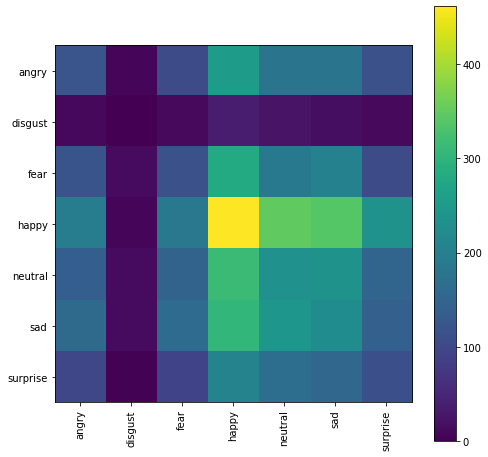

In [18]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(test_set.classes, y_pred)

print('Confusion Matrix')
print(cm_test)
print('Classification Report')

target_names = list(class_labels.values())

print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)